## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, gc, joblib
from scipy.stats import probplot

warnings.filterwarnings('ignore')
# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import BorderlineSMOTE


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Loading the dataset

In [2]:
df = pd.read_csv('/kaggle/input/weather-data/Weather Data.csv')
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.shape

(8784, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [5]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [6]:
df.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Exploratory Data Analysis

Skewness of Temp_C: -0.17766634898276745
Kurtosis of Temp_C: -0.9155567505542197


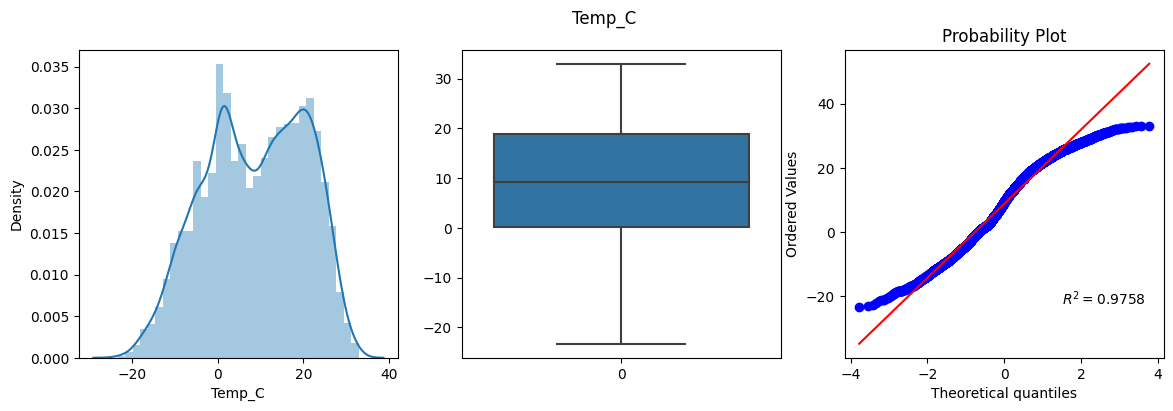

Skewness of Dew Point Temp_C: -0.31843338608156885
Kurtosis of Dew Point Temp_C: -0.8157875944814732


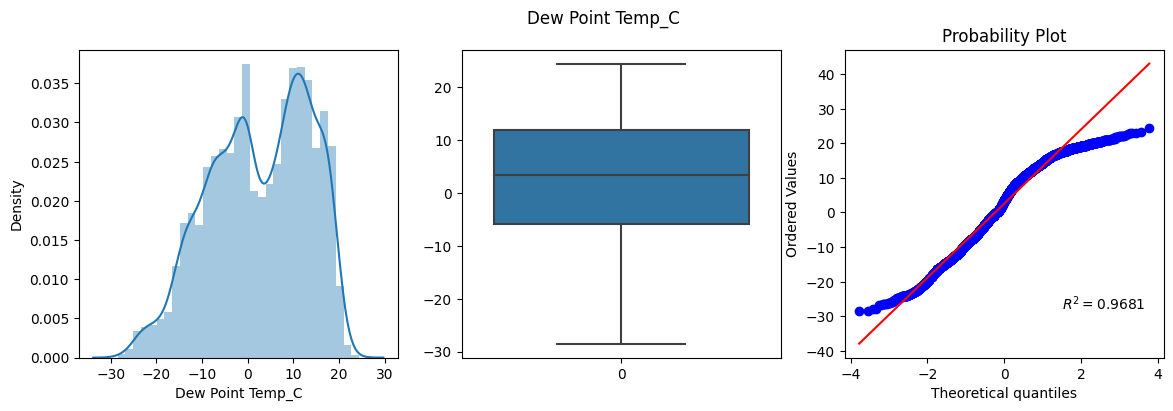

Skewness of Rel Hum_%: -0.32383026939145887
Kurtosis of Rel Hum_%: -0.5529352317433536


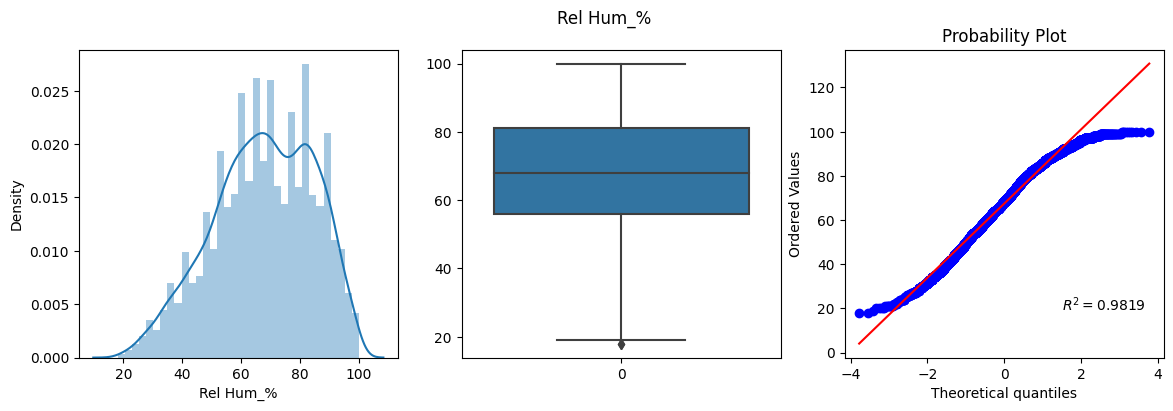

Skewness of Wind Speed_km/h: 0.8713742625776061
Kurtosis of Wind Speed_km/h: 1.5407125247939306


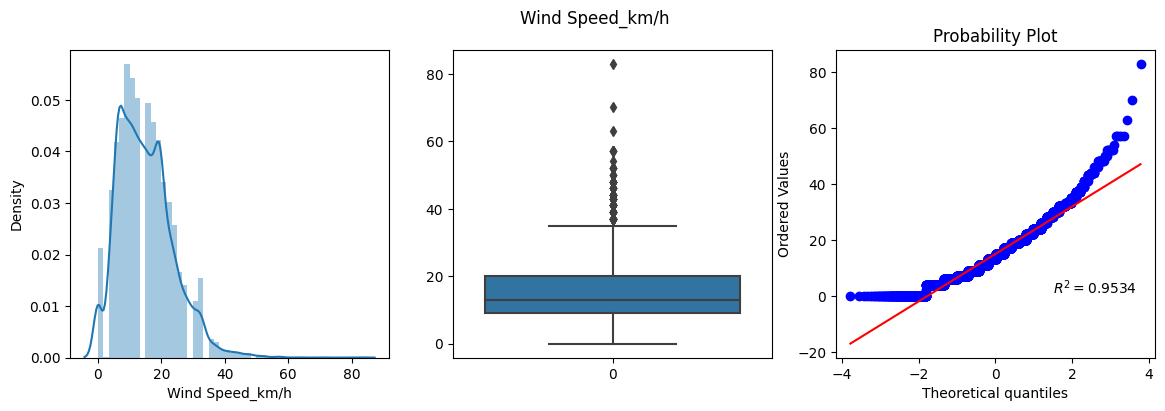

Skewness of Visibility_km: 0.41336159676061063
Kurtosis of Visibility_km: -0.35103132005897164


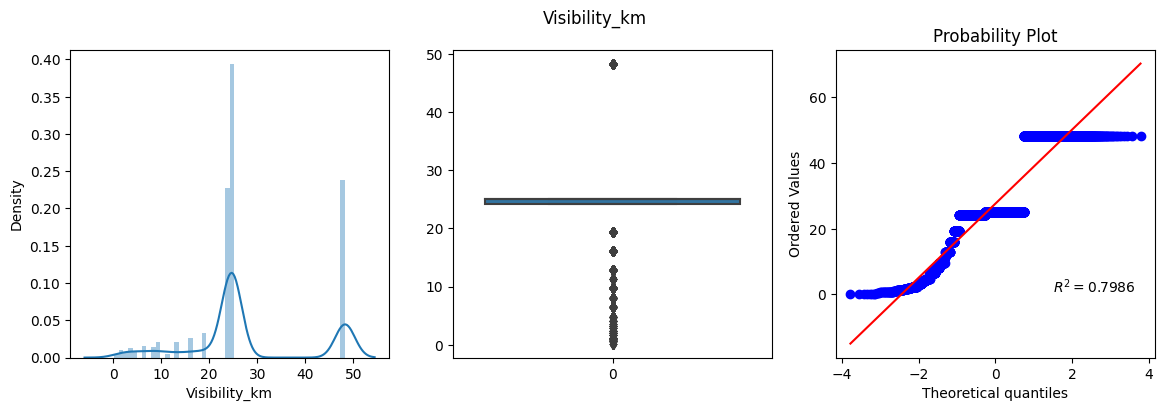

Skewness of Press_kPa: -0.22992511978286803
Kurtosis of Press_kPa: 0.7144508236613349


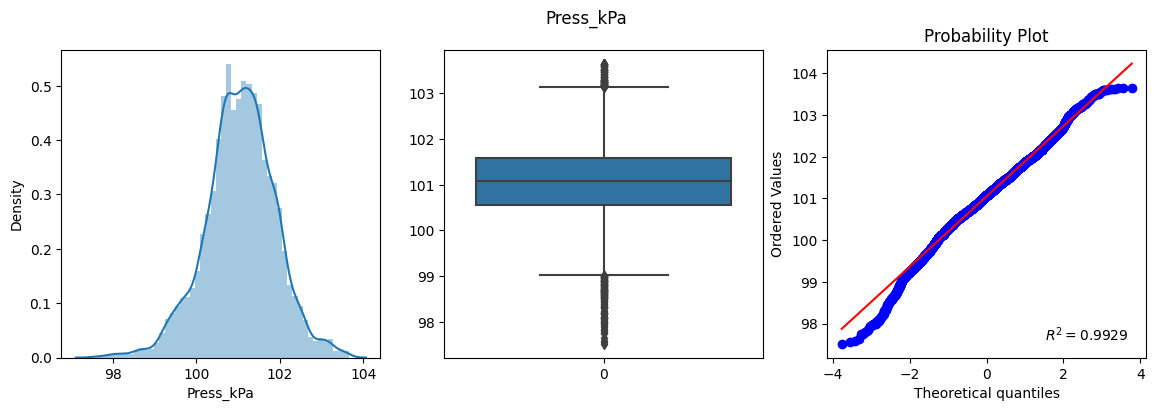

In [8]:
for col in df.select_dtypes(np.number).columns:
    plt.figure(figsize=(14,4))
    print(f"Skewness of {col}:",df[col].skew())
    print(f"Kurtosis of {col}:",df[col].kurtosis())
    plt.subplot(131)
    sns.distplot(df[col])
    plt.subplot(132)
    sns.boxplot(df[col])
    plt.subplot(133)
    probplot(df[col],dist='norm',rvalue=True,plot=plt)
    plt.suptitle(col)
    plt.show()

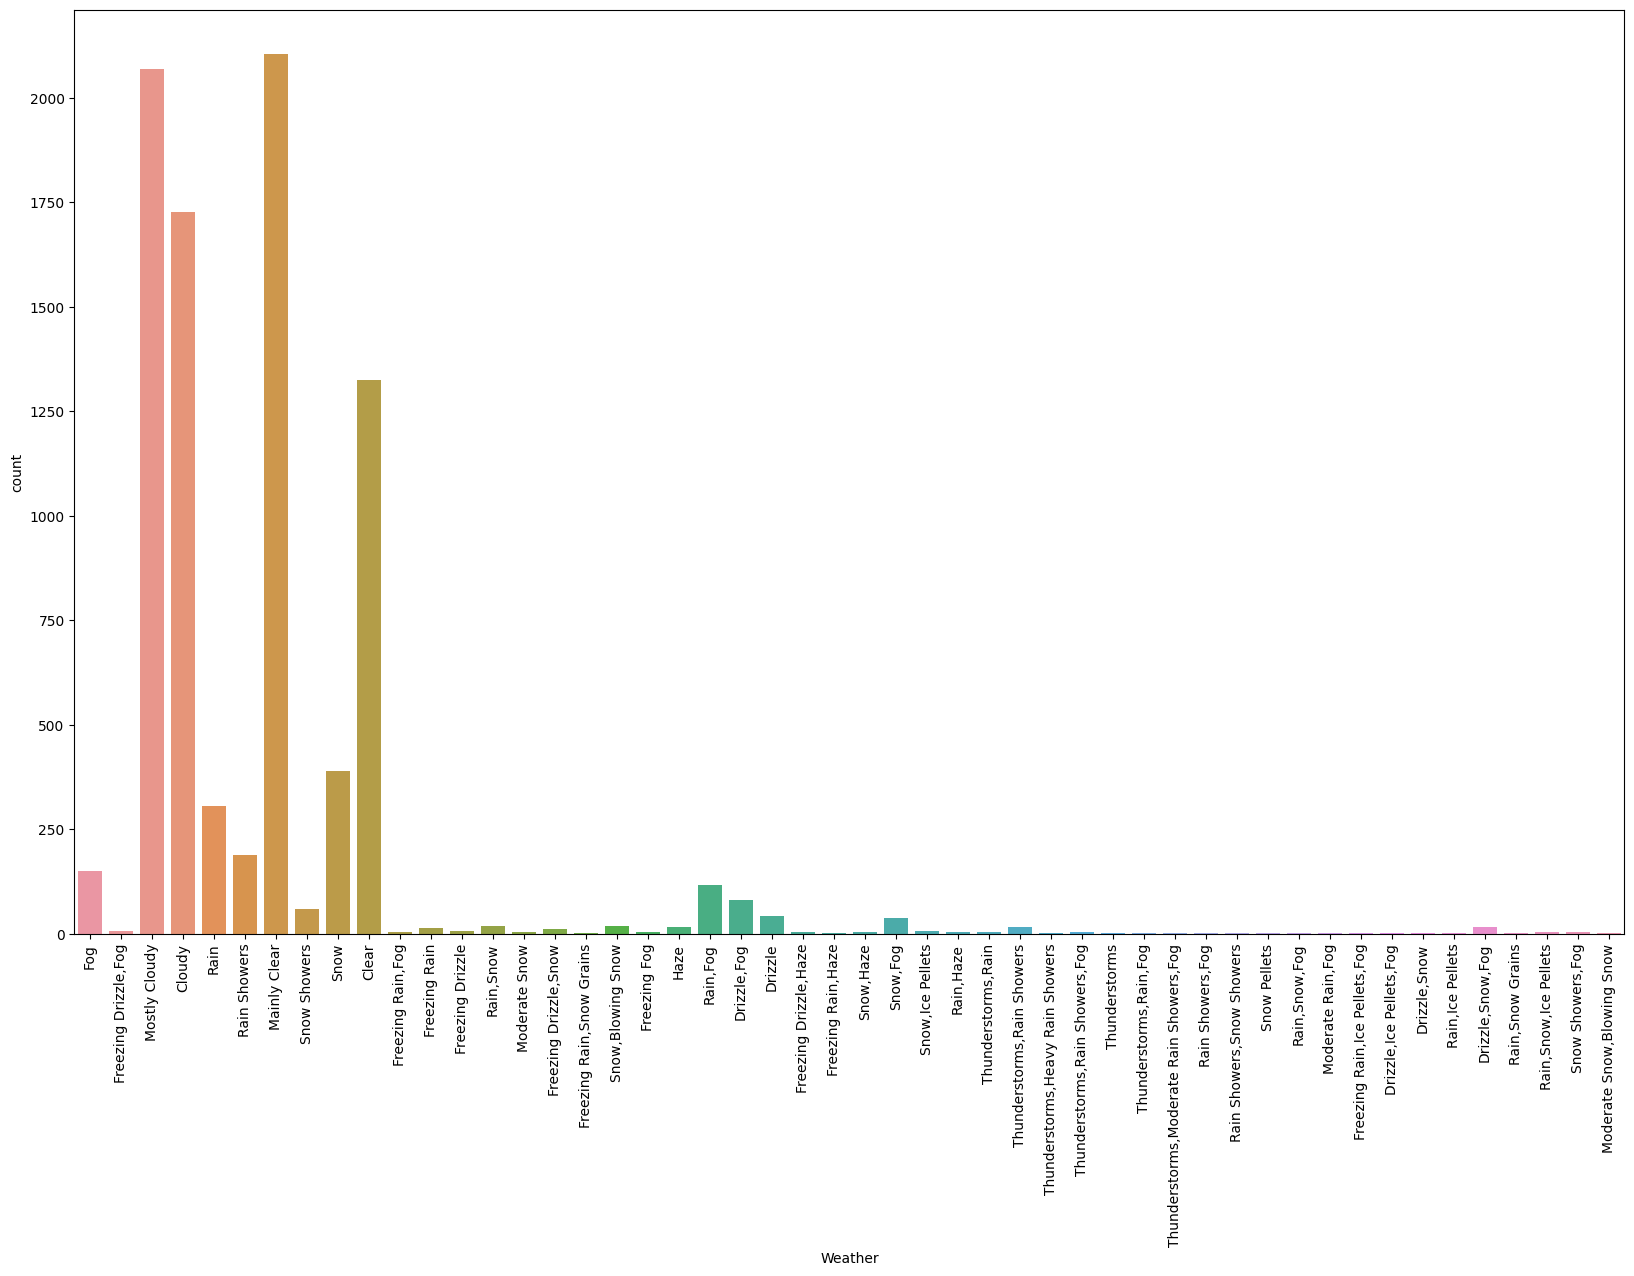

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.countplot(x=df['Weather'])  # Use countplot for value counts
plt.xticks(rotation=90)
plt.show()


In [10]:
df.Weather.nunique()

50

In [11]:
df.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [12]:
categories = ['Clear','Cloudy','Snow','Rain','Drizzle','Fog','Thunderstorms','Haze']

df.Weather.replace(to_replace='Mainly Clear',value='Clear',inplace=True)
df.Weather.replace(to_replace='Mostly Cloudy',value='Cloudy',inplace=True)
df.Weather.replace(to_replace=['Snow Showers','Snow,Blowing Snow','Rain,Snow','Freezing Drizzle,Snow','Freezing Rain,Snow Grains','Snow,Ice Pellets','Moderate Snow','Rain,Snow,Ice Pellets','Drizzle,Snow','Rain Showers,Snow Showers','Moderate Snow,Blowing Snow','Snow Pellets','Rain,Snow Grains'],value='Snow',inplace=True)
df.Weather.replace(to_replace=['Rain Showers','Freezing Rain','Rain,Ice Pellets'],value='Rain',inplace=True)
df.Weather.replace(to_replace='Freezing Drizzle',value='Drizzle',inplace=True)
df.Weather.replace(to_replace=['Rain,Fog','Drizzle,Fog','Snow,Fog','Drizzle,Snow,Fog','Freezing Drizzle,Fog','Freezing Fog','Snow Showers,Fog','Freezing Rain,Fog','Thunderstorms,Rain Showers,Fog','Rain Showers,Fog','Thunderstorms,Moderate Rain Showers,Fog','Rain,Snow,Fog','Moderate Rain,Fog','Freezing Rain,Ice Pellets,Fog','Drizzle,Ice Pellets,Fog','Thunderstorms,Rain,Fog'],value='Fog',inplace=True)
df.Weather.replace(to_replace=['Thunderstorms,Rain Showers','Thunderstorms,Rain','Thunderstorms,Heavy Rain Showers'],value='Thunderstorms',inplace=True)
df.Weather.replace(to_replace=['Snow,Haze','Rain,Haze','Freezing Drizzle,Haze','Freezing Rain,Haze',],value='Haze',inplace=True)

In [13]:
df.Weather.value_counts()

Weather
Cloudy           3797
Clear            3432
Snow              521
Rain              509
Fog               426
Drizzle            48
Haze               29
Thunderstorms      22
Name: count, dtype: int64

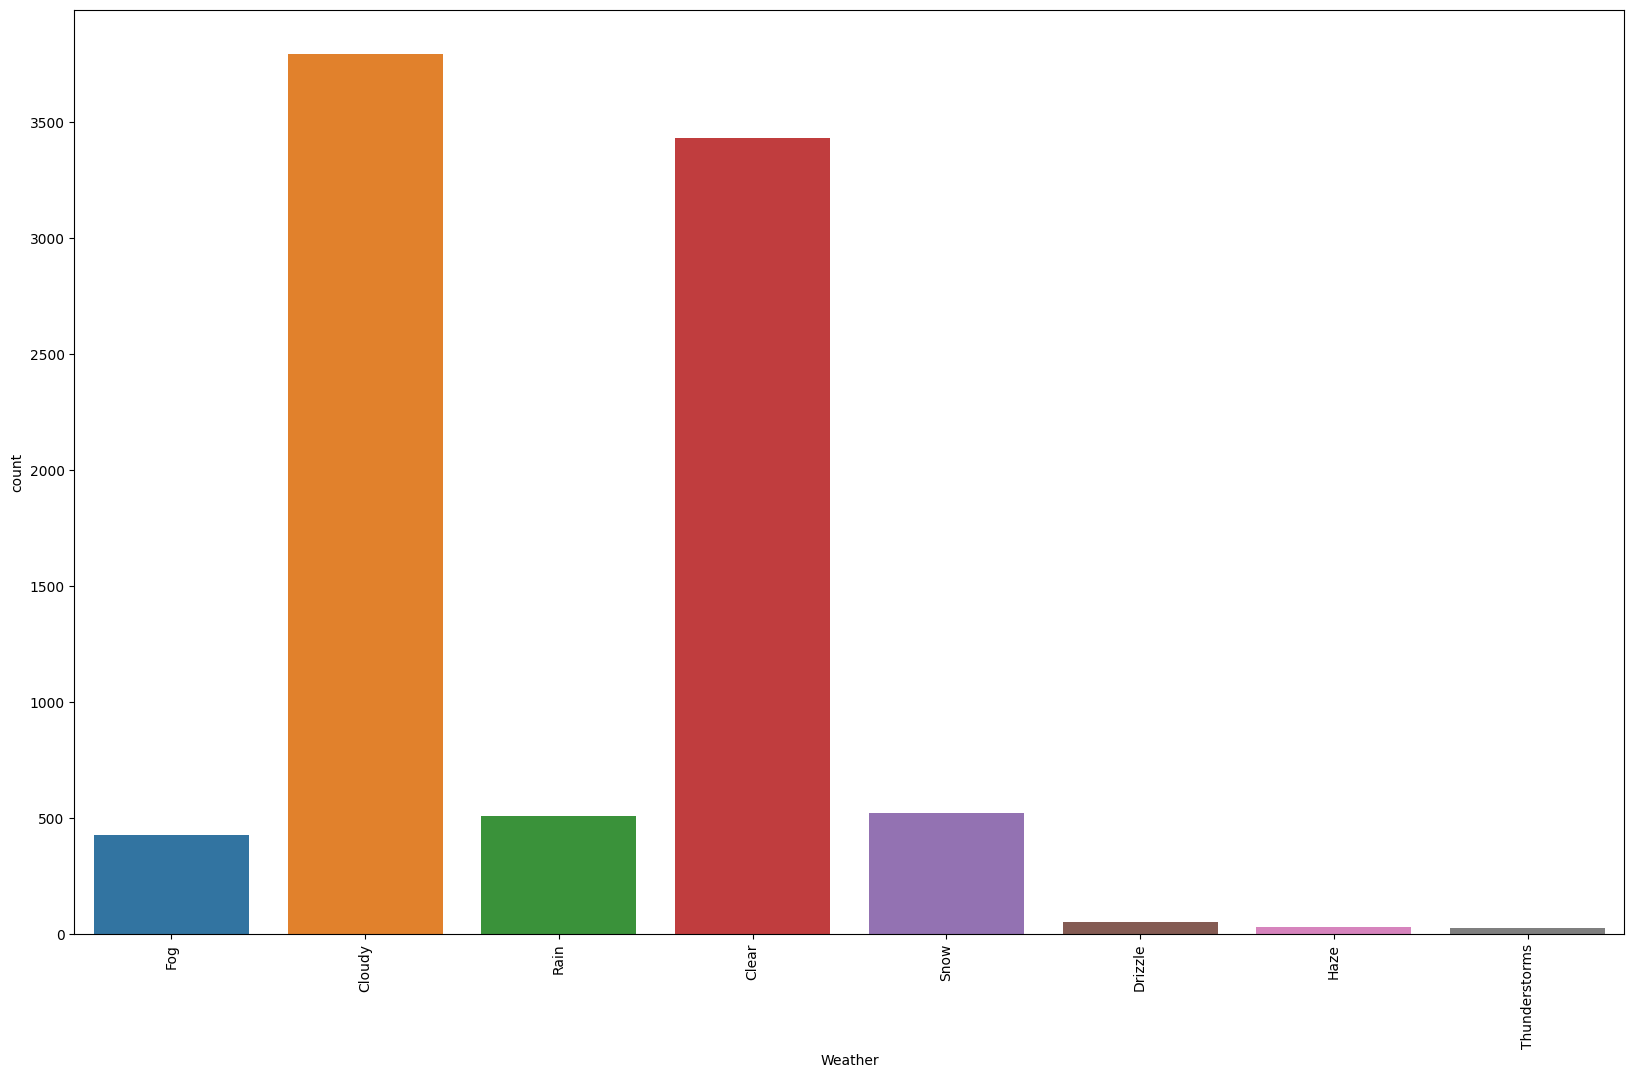

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
sns.countplot(x=df['Weather'])  # Use countplot for value counts
plt.xticks(rotation=90)
plt.show()


This is clearly an imbalanced dataset with 'Cloudy' and 'Clear' being the majority classes and the remaining ones being the minority classes. 

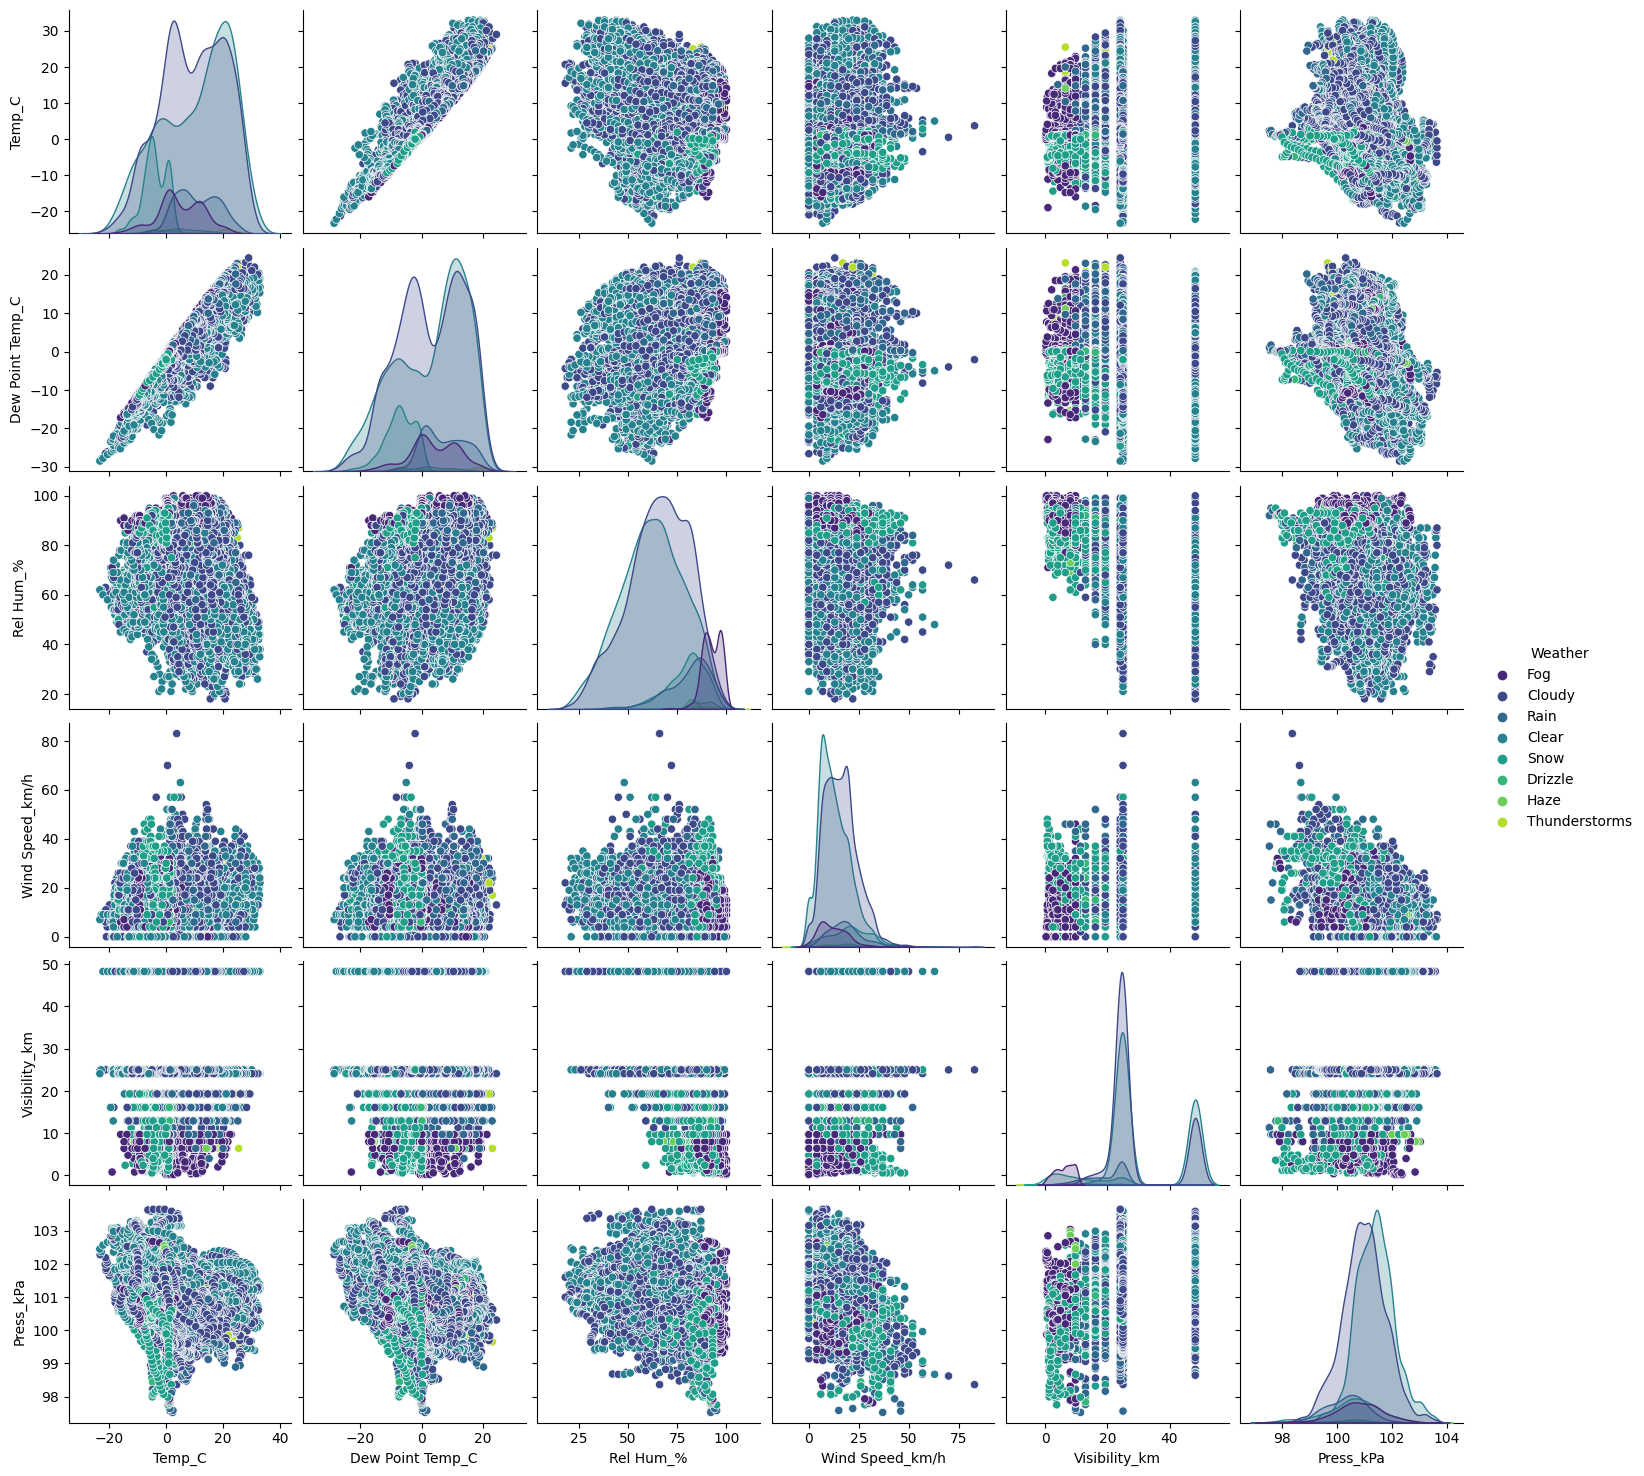

4573

In [15]:
fig = sns.pairplot(df,hue='Weather',palette='viridis')
plt.show(fig)
plt.close('all')
del fig
gc.collect()

## Feature Engineering

### Feature Extraction

In [16]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'],errors='coerce')

In [17]:
df['Year'] = df['Date/Time'].dt.year
df['Month'] = df['Date/Time'].dt.month
df['Day'] = df['Date/Time'].dt.day

In [18]:
df.drop('Date/Time',axis=1,inplace=True)

### Outlier Treatment

In [19]:
skewed_cols = ['Press_kPa','Visibility_km','Wind Speed_km/h']

def remove_outliers(data,col):
    lower_limit, upper_limit = data[col].quantile([0.25,0.75])
    IQR = upper_limit - lower_limit
    lower_whisker = lower_limit - 1.5 * IQR
    upper_whisker = upper_limit + 1.5 * IQR
    return np.where(data[col]<lower_whisker,lower_whisker,np.where(data[col]>upper_whisker,upper_whisker,data[col]))

In [20]:
for col in skewed_cols:
    df[col] = remove_outliers(df,col)

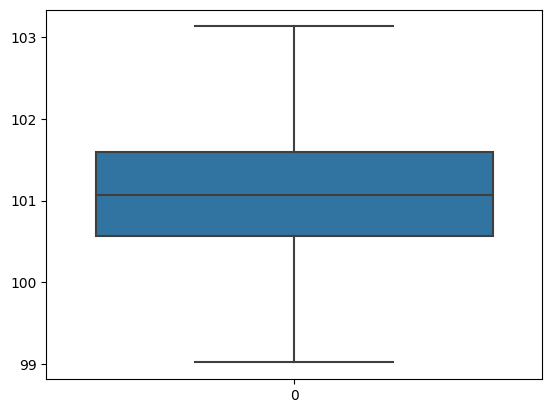

In [21]:
fig = sns.boxplot(df['Press_kPa'])
plt.show(fig)
plt.close('all')
del fig
gc.collect();

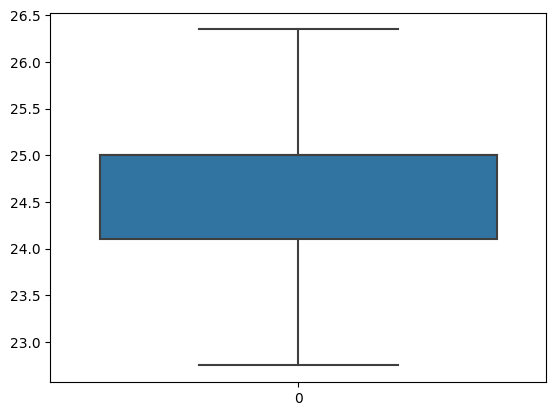

In [22]:
fig = sns.boxplot(df['Visibility_km'])
plt.show(fig)
plt.close('all')
del fig
gc.collect();

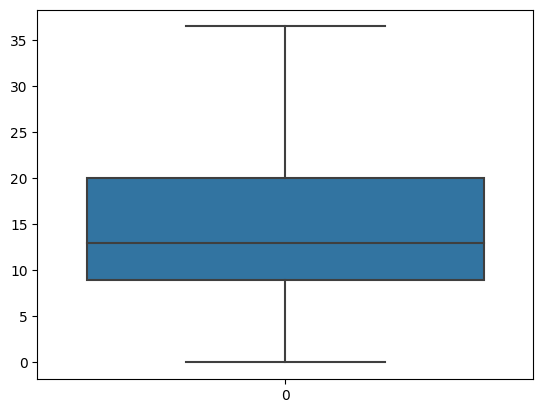

In [23]:
fig = sns.boxplot(df['Wind Speed_km/h'])
plt.show(fig)
plt.close('all')
del fig
gc.collect();

All the outliers have been imputed successfully using the winsorization technique.

In [24]:
df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Year,Month,Day
0,-1.8,-3.9,86,4.0,22.75,101.24,Fog,2012,1,1
1,-1.8,-3.7,87,4.0,22.75,101.24,Fog,2012,1,1
2,-1.8,-3.4,89,7.0,22.75,101.26,Fog,2012,1,1
3,-1.5,-3.2,88,6.0,22.75,101.27,Fog,2012,1,1
4,-1.5,-3.3,88,7.0,22.75,101.23,Fog,2012,1,1
...,...,...,...,...,...,...,...,...,...,...
8779,0.1,-2.7,81,30.0,22.75,100.13,Snow,2012,12,31
8780,0.2,-2.4,83,24.0,22.75,100.03,Snow,2012,12,31
8781,-0.5,-1.5,93,28.0,22.75,99.95,Snow,2012,12,31
8782,-0.2,-1.8,89,28.0,22.75,99.91,Snow,2012,12,31


In [25]:
df.Weather.value_counts()


Weather
Cloudy           3797
Clear            3432
Snow              521
Rain              509
Fog               426
Drizzle            48
Haze               29
Thunderstorms      22
Name: count, dtype: int64

### Feature Splitting

In [26]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
label_encoder = LabelEncoder()

# Apply the label encoder to the 'attack_cat' column
df['Weather'] = label_encoder.fit_transform(df['Weather'])

In [27]:
df['Weather'].value_counts()

Weather
1    3797
0    3432
6     521
5     509
3     426
2      48
4      29
7      22
Name: count, dtype: int64

In [28]:
df.to_csv('weather_clean.csv',index=False)


In [29]:
X = df.drop('Weather',axis=1)
y = df.Weather

### Balancing the target classes

In [30]:
borderline_smote = BorderlineSMOTE()
X, y = borderline_smote.fit_resample(X,y)

In [31]:
y.value_counts()

Weather
3    3797
1    3797
5    3797
0    3797
6    3797
2    3797
4    3797
7    3797
Name: count, dtype: int64

All the classes are perfectly balanced now so there won't be any problem of imbalanced classification.

### Train Test Split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [33]:
print("Shape of the training set:",X_train.shape)
print("Shape of the testing set:",X_test.shape)

Shape of the training set: (21263, 9)
Shape of the testing set: (9113, 9)


### Label Encoding

In [34]:
label_encoder.classes_

array(['Clear', 'Cloudy', 'Drizzle', 'Fog', 'Haze', 'Rain', 'Snow',
       'Thunderstorms'], dtype=object)

In [35]:
label_mapping = {label:idx for idx, label in enumerate(label_encoder.classes_)}
label_mapping

{'Clear': 0,
 'Cloudy': 1,
 'Drizzle': 2,
 'Fog': 3,
 'Haze': 4,
 'Rain': 5,
 'Snow': 6,
 'Thunderstorms': 7}

In [36]:
# decision Tree

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 1.0
Test accuracy: 0.9012399868319982
********************
[0.77485188 0.8126749  0.82139918 0.82979424 0.78814815]
0.8053736674279429
********************
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1150
           1       0.69      0.68      0.69      1130
           2       0.98      0.99      0.99      1159
           3       0.95      0.96      0.95      1145
           4       0.99      1.00      0.99      1125
           5       0.89      0.91      0.90      1133
           6       0.93      0.95      0.94      1136
           7       0.99      0.99      0.99      1135

    accuracy                           0.90      9113
   macro avg       0.90      0.90      0.90      9113
weighted avg       0.90      0.90      0.90      9113

********************
90.12% Accurate
********************


In [37]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.935367058048941
train accuracy: 1.0
********************
0.831677484374873
********************
********************
93.54% Accurate


In [38]:

# logistic regression

LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)



print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.5401075386810051
train accuracy: 0.5415510511216668
********************
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1150
           1       0.69      0.68      0.69      1130
           2       0.98      0.99      0.99      1159
           3       0.95      0.96      0.95      1145
           4       0.99      1.00      0.99      1125
           5       0.89      0.91      0.90      1133
           6       0.93      0.95      0.94      1136
           7       0.99      0.99      0.99      1135

    accuracy                           0.90      9113
   macro avg       0.90      0.90      0.90      9113
weighted avg       0.90      0.90      0.90      9113

********************
54.01% Accurate


In [39]:

XGB = XGBClassifier(random_state=45)
XGB.fit(X_train, y_train)

# prediction
train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


XGB_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.9275759903434654
train accuracy: 0.9887127874711941
********************
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      1150
           1       0.69      0.68      0.69      1130
           2       0.98      0.99      0.99      1159
           3       0.95      0.96      0.95      1145
           4       0.99      1.00      0.99      1125
           5       0.89      0.91      0.90      1133
           6       0.93      0.95      0.94      1136
           7       0.99      0.99      0.99      1135

    accuracy                           0.90      9113
   macro avg       0.90      0.90      0.90      9113
weighted avg       0.90      0.90      0.90      9113

********************
92.76% Accurate


In [40]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier(random_state=45)
ada.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= ada.predict(X_train)
test_prediction= ada.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)


#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
ada_h = accuracy_score(test_prediction,y_test)
print(f"{round(ada_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.31537364204981894
train accuracy: 0.3180642430513098
********************
********************
31.54% Accurate


In [41]:
from sklearn.ensemble import GradientBoostingClassifier


gbc=GradientBoostingClassifier(random_state=45)
gbc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)


#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gbc_h = accuracy_score(test_prediction,y_test)
print(f"{round(gbc_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.8508723801163174
train accuracy: 0.8722663782156799
********************
********************
85.09% Accurate


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model
knn_model=KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# prediction

train_prediction= knn_model.predict(X_train)
test_prediction= knn_model.predict(X_test)

# evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:',accuracy_score(y_test,test_prediction))
print('Train accuracy:',accuracy_score(y_train,train_prediction))

print('*'*20)
result = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(result)


print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_prediction))


print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction,y_test)
print(f"{round(Knn_SC*100,2)}% Accurate")


********************
Test accuracy: 0.8826950510260068
Train accuracy: 0.9224474439166628
********************
Confusion Matrix:
[[ 832  232    4   25    2   29   19    7]
 [ 335  532   16   36   13  126   70    2]
 [   0    1 1153    3    0    1    1    0]
 [   2    1   13 1100    4   16    8    1]
 [   0    1    0    0 1124    0    0    0]
 [  13   25   12   19    4 1056    3    1]
 [   4    9    1    6    0    3 1113    0]
 [   0    1    0    0    0    0    0 1134]]
********************
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1150
           1       0.66      0.47      0.55      1130
           2       0.96      0.99      0.98      1159
           3       0.93      0.96      0.94      1145
           4       0.98      1.00      0.99      1125
           5       0.86      0.93      0.89      1133
           6       0.92      0.98      0.95      1136
           7       0.99      1.00      0.99      1135

    accuracy     

In [43]:
score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC,ada_h,gbc_h]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','AdaBoost',"GradientBoostingClassifier"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.935367
4,XGBoost,0.927576
0,Decision Tree,0.901240
3,Knn,0.882695
6,GradientBoostingClassifier,0.850872
2,Logistic Regression,0.540108
5,AdaBoost,0.315374


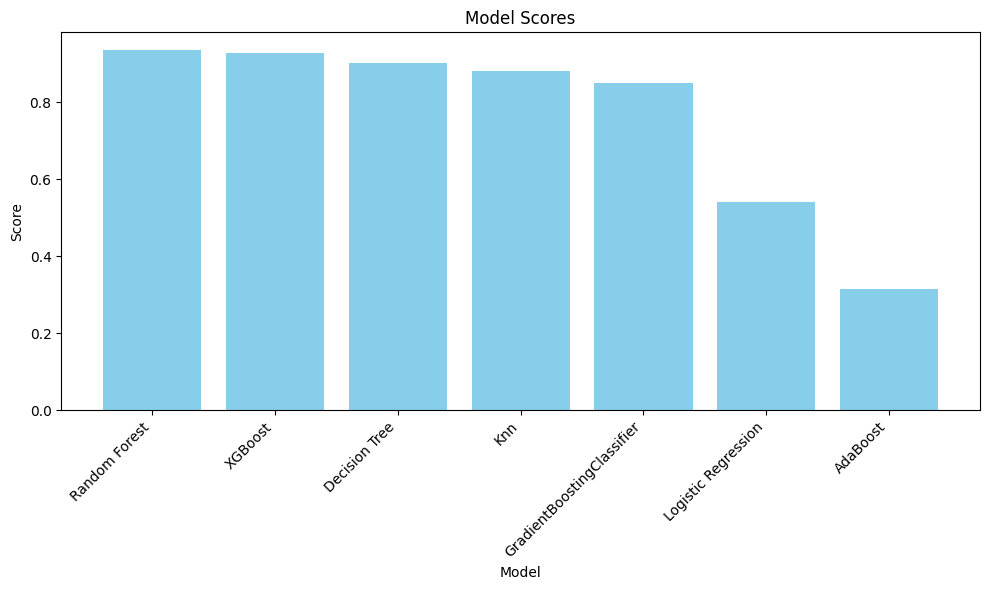

In [44]:
# Create a DataFrame
Models = pd.DataFrame({
  'Model': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','AdaBoost',"GradientBoostingClassifier"],
    'Score': score})

# Sort the DataFrame by 'Score' in descending order
Models_sorted = Models.sort_values(by='Score', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(Models_sorted['Model'], Models_sorted['Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Scores')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
import pickle
#save the model
model =rfc# Your machine learning model object
file_path = 'rfc_w.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [46]:
# load the model
import pickle

file_path = 'rfc_w.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [47]:
X_train

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Year,Month,Day
8542,0.700000,0.000000,95,28.000000,22.750000,99.015000,2012,12,21
586,-5.300000,-11.400000,62,22.000000,24.100000,102.090000,2012,1,25
23607,-0.453901,-2.746944,84,19.069571,22.750000,99.772958,2012,2,3
21603,6.551685,2.282303,74,15.435394,24.100000,99.564761,2012,4,10
17354,-1.124502,-3.861232,81,6.979619,22.750000,102.016531,2012,11,20
...,...,...,...,...,...,...,...,...,...
29802,18.757597,15.697894,82,13.400495,22.750000,99.900074,2012,5,29
5390,26.400000,17.000000,56,13.000000,26.350000,100.620000,2012,8,12
860,-2.800000,-8.000000,67,24.000000,25.000000,101.250000,2012,2,5
15795,9.841535,7.841535,87,22.074023,22.750000,100.853400,2012,5,1


In [ ]:
loaded_model.predict([[2.6,	-0.2,	82,	13,	22.75,	99.93,2012,	1,1]]) #1


array([1])

In [49]:
loaded_model.predict([[-1.4,-3.6,85,7,22.75,101.26,	2012,1,	1]])

array([3])